In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path

In [2]:
from src.main_discontinu import *
from src.plot_fields import *

%matplotlib widget
rc("figure", figsize=(10, 5))
rc("figure", dpi=100)

# Paramètres de la simulation

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en QUICK avec Euler explicite en temps.

La référence utilisée est une simulation TOF sur maillage fin.

In [3]:
n_lim = 10**9
t_fin_lim = 0.2

In [4]:
from copy import copy

Vtot = 0.02 * 0.005**2

phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)

phy_prop_sans_conv = copy(phy_prop)
phy_prop_sans_conv.v = 0.0

nums_prop = [
    NumericalProperties(
        dx=dx, schema="quick", time_scheme="euler", phy_prop=phy_prop, cfl=1.0
    )
    for dx in [
        2.0 * 10**-5,
        3.5 * 10**-5,
        5.01 * 10**-5,
        7.0 * 10**-5,
        9.0 * 10**-5,
    ]
]

num_prop_ref = NumericalProperties(
    dx=0.7 * 10**-5, schema="weno", time_scheme="rk3", phy_prop=phy_prop, cfl=1.0
)
markerss = [
    BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
    for num_prop in nums_prop
]
# for markers in markerss:
# markers.shift(0.0001)

In [5]:
init_params_ref = {
    "markers": markerss[-1],
    "phy_prop": phy_prop_sans_conv,
    "num_prop": num_prop_ref,
}
init_params = {"phy_prop": phy_prop}

# Convergence de l'opérateur ProblemDiscontinuE

On cherche a vérifier que ProblemDiscontinuE tend bien vers la solution TOF sans convection.

## Simulation comparée

In [6]:
probs_E = []
for i in range(len(nums_prop)):
    probs_E.append(
        ProblemDiscontinuE(
            get_T_creneau,
            **init_params,
            num_prop=nums_prop[i],
            markers=markerss[i],
            interp_type="Ti",
        )
    )

dt fourier
1.8172585062055175e-06
Db / dx = 59
Ti
dt fourier
5.5625697579494996e-06
Db / dx = 34
Ti
dt fourier
1.1392050341716529e-05
Db / dx = 23
Ti
dt fourier
2.232841866976439e-05
Db / dx = 17
Ti
dt fourier
3.679948475066174e-05
Db / dx = 13
Ti


dt fourier
2.2219137987283143e-07
Db / dx = 171
References/TOF, rk3, weno, dx = 7.00035e-06, dt = 2.2e-07_t_0.200000.pkl
Db / dx = 171
Reference was loaded

ESP
===

ESP
===

ESP
===

ESP
===

ESP
===


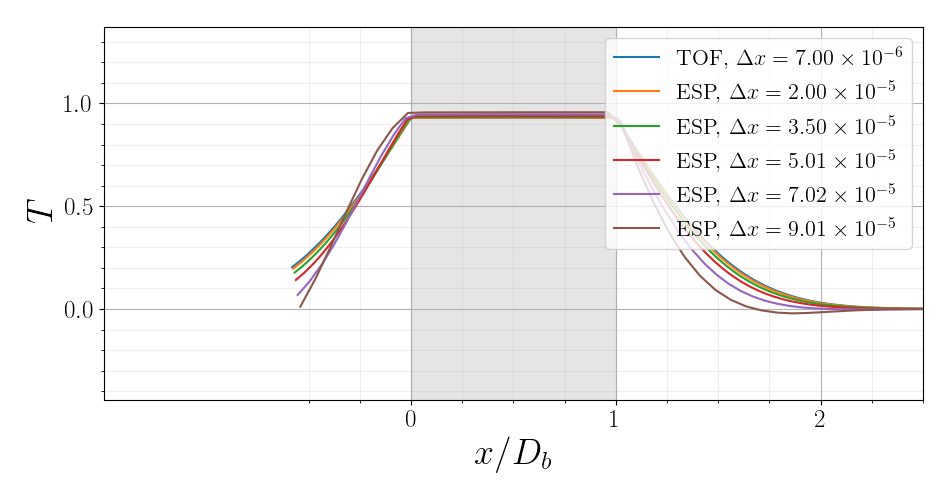

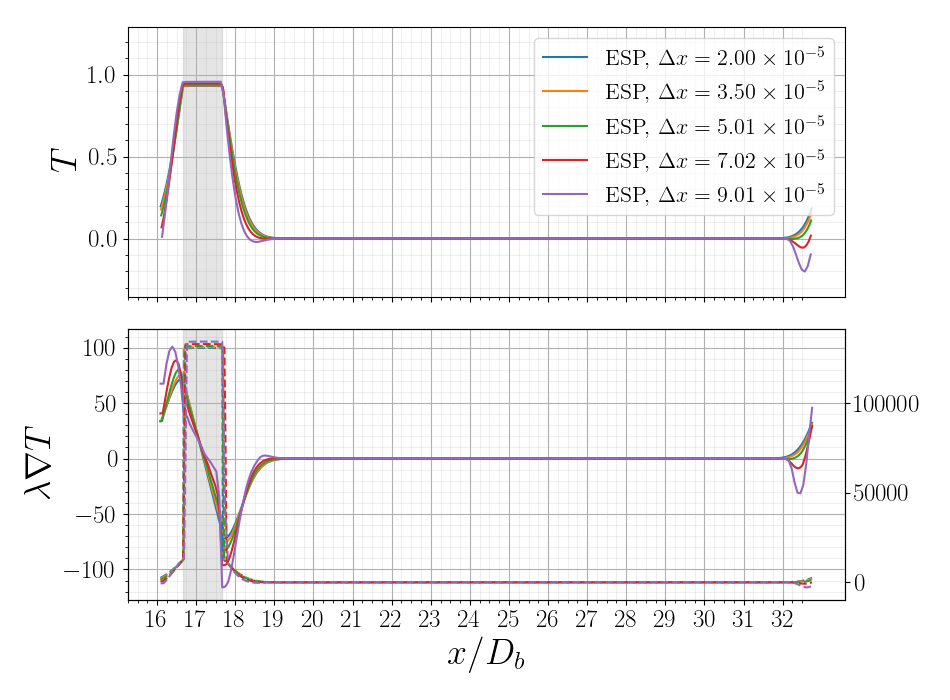

In [7]:
t_fin = 1.0

plot_tot = Plotter(
    "decale", flux_conv=False, lda_gradT=False, zoom=(-1.5, 2.5), dx=True, time=False
)
plot_1 = Plotter("decale", flux_conv=True, lda_gradT=True, dx=True, time=False)

time_args = {"t_fin": min(t_fin, t_fin_lim), "n": n_lim, "number_of_plots": 1}

prob_ref = Problem(get_T_creneau, **init_params_ref)
t_ref, e_ref = prob_ref.load_or_compute(**time_args, plotter=[plot_tot])

for prob_E in probs_E:
    prob_E.timestep(**time_args, plotter=[plot_1, plot_tot])

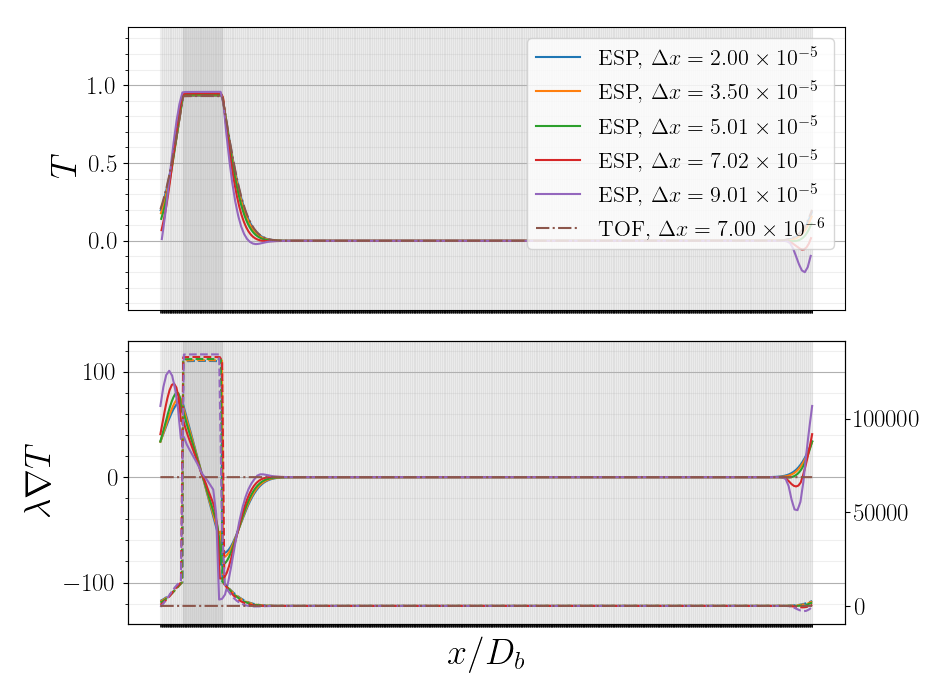

In [13]:
plotter = Plotter(
    "classic", flux_conv=True, lda_gradT=True, dx=True, time=False, ispretty=False
)
# plotter.plot(prob_ref)
for pb in probs_E:
    plotter.plot(pb)
plotter.plot(prob_ref, plot_Ti=False, ls="-.")